We had a look at how ANOVA can be used to compare multiple groups at once. Now
it is time for you to try

 - Replace _ to complete expressions and return the correct answer 
 - Restart R to remove previous results using: Ctrl/Cmd + shift + F10
 - Remember - try to use google to help you answer questions

## Import packages

Import the `tidyverse` for `dplyr` and `ggplot2` packages

In [1]:
library("tidyverse")
library("dplyr")
library("ggplot2")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## One-way ANOVA

`Turtles.csv` is a study that examined the he hatching times of turtle eggs 
incubated at four different temperatures (15°C, 20°C, 25°C and 30°C). Hatching 
time (Days) is the continuous response variable and temperature is the categorical 
predictor variable with with four levels. 

### Import the data

Import `Turtles.csv` from the `data/` folder

In [21]:
turtle_hatching <- read.csv(file = '../data/Turtles.csv')

### Examine the data 

Count the number of observations per temperature

- Confirm there are 4 temperature levels
- How many replicates are there per temperature? If they are all the same, we called this a 'balanced design'

In [3]:
summary(turtle_hatching)

  Temperature         Days      
 Min.   :15.00   Min.   :11.00  
 1st Qu.:18.75   1st Qu.:27.50  
 Median :22.50   Median :46.00  
 Mean   :22.50   Mean   :43.08  
 3rd Qu.:26.25   3rd Qu.:57.25  
 Max.   :30.00   Max.   :75.00  

In [7]:
turtle_hatching |> 
count(Temperature)

Temperature,n
<int>,<int>
15,10
20,10
25,10
30,10


***-> There are 10 replicates per temperature level, so it is a 'balanced design'.***

### Visualise data

Create a boxplot of days until hatching by temperature groups

 - There should be 4 boxes. 
 - What data type is Temperature currently? We will fix it in the next step
 

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


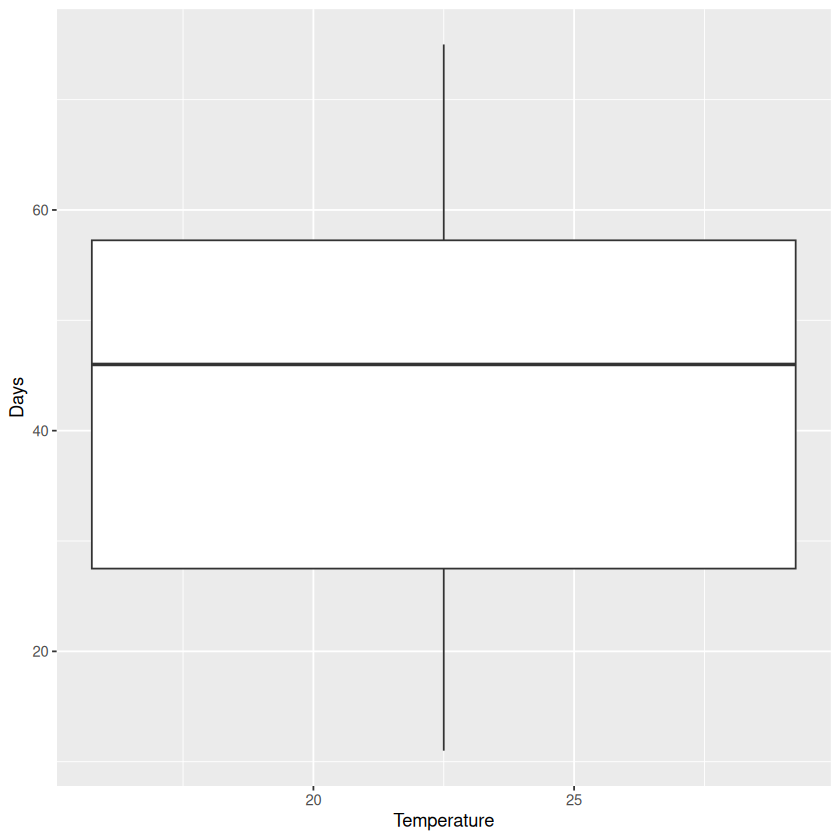

In [22]:
turtle_hatching |>
ggplot(aes(x = Temperature, y = Days)) +
geom_boxplot() #+
#geom_jitter(height = 0, width = 0.125, alpha = 0.25)

#### Data transformation 

Turn Temperature into a factor using `mutate()` and `factor()`, then remake the 
boxplot (next section)

In [23]:
turtle_hatching <-
  turtle_hatching |>
  mutate (Temperature = factor(Temperature)) 

#### Recreate the boxplot

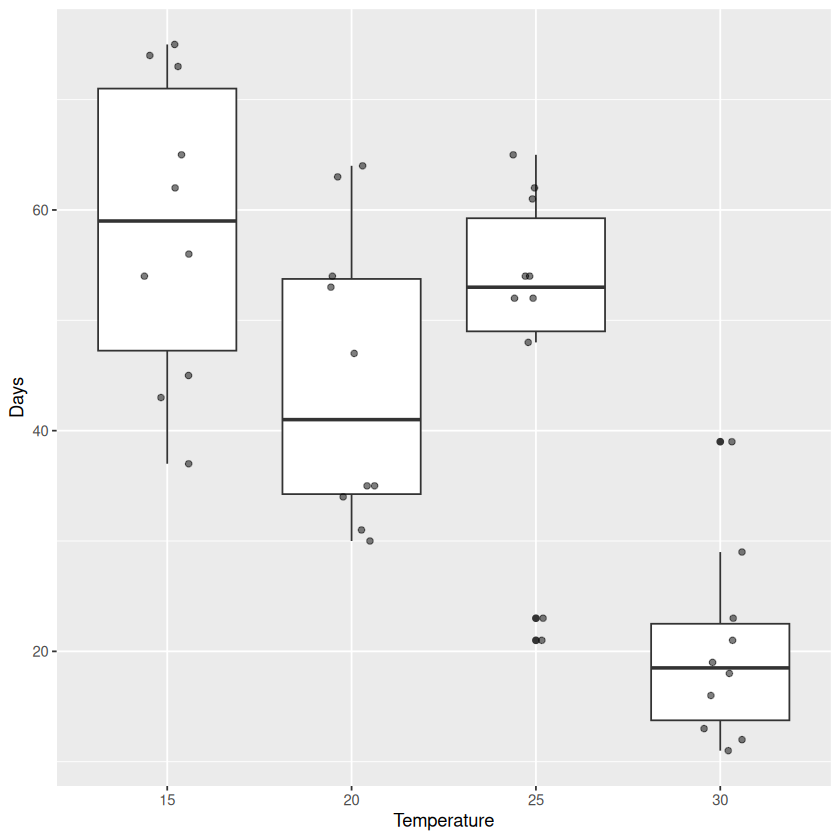

In [27]:
turtle_hatching |>
ggplot(aes(x = Temperature, y = Days)) +
geom_boxplot() +
geom_jitter(height = 0, width = 0.125, alpha = 0.5)

Export the plot to the outputs folder as a 120 x 120 mm .png

In [28]:
ggsave(
    filename = '../outputs/turtle_hatching_box-dot.png',
    width = 120,
    height = 120,
    units = 'mm'
)

### Conduct an ANOVA
What is the null hypothesis here?\
***->That the mean number of days to hatch is the same across different temperature levels.***

Create an ANOVA object using `aov()`

 - Remember to use a formula y ~ x and provide the data argument

In [29]:
turtle_hatching_aov <-
    aov(Days ~ Temperature, data = turtle_hatching)

Obtain the traditional ANOVA table using `summary()`

In [30]:
summary(turtle_hatching_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Temperature  3   8025  2675.2   15.98 9.08e-07 ***
Residuals   36   6027   167.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Is there a difference in hatching time between the 4 temperatures tested?\
***->Yes, at a significance level <0.001***

### Conduct pairwise comparisons

Use `TukeyHSD()` to conduct pairwise comparisons. Which temperatures differed from each other?

In [31]:
TukeyHSD(turtle_hatching_aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Days ~ Temperature, data = turtle_hatching)

$Temperature
       diff       lwr        upr     p adj
20-15 -13.8 -29.38469   1.784689 0.0982694
25-15  -9.2 -24.78469   6.384689 0.3969971
30-15 -38.3 -53.88469 -22.715311 0.0000006
25-20   4.6 -10.98469  20.184689 0.8562615
30-20 -24.5 -40.08469  -8.915311 0.0008384
30-25 -29.1 -44.68469 -13.515311 0.0000785


Write a short conclusion paragraph\
***->Pairwise comparison with p-values lower than 0.05 ($\alpha$< 0.05) shows differences between temperature levels 15-30, 20-30 and 25-30***

---
## Extra exercises

### One factor ANOVA - Bag strength

A paper manufacturer makes grocery bags. They are interested in increasing the 
tensile strength of their product. It is thought that strength is a function of
the hardwood concentration in the pulp. An investigation is carried out to compare
four levels of hardwood concentration: 5%, 10%, 15% and 20%. Six test specimens 
are made at each level and all 24 specimens are then tested in random order

# Import data


In [ ]:
bags <-
  readr::read_csv()


# Examine data and prepare
bags %>% 
  count(_)

bags %>% 
  ggplot(aes(x = _, y = _)) +
  _

bags <- 
  bags %>% 
  mutate(_ = factor(_))

bags %>% 
  ggplot(aes(x = _, y = _)) +
  geom_boxplot()

# ANOVA
bags_aov <-
  aov(_ ~ _, data = _)

_ %>% 
  summary()

# Pairwise comparisons 
bags_aov %>% 
  _()
```


### Two factor ANOVA - Battery life

`battery_life.csv` contains data on battery life under different temperature and
materials: The effective life (in hours) of batteries is compared by material type 
(1, 2 or 3) and operating temperature: Low (-10˚C), Medium (20˚C) or High (45˚C).
Twelve batteries are randomly selected from each material type and are then randomly 
allocated to each temperature level.


```{r, eval = F}
# Import battery_life.csv
battery_life <-
  readr::read_csv(_)

# Examine data
battery_life %>% 
  count(_, _)

# Prepare data
# material_type is numeric and needs to be a factor
# temperature requires used to specific the levels of the factor for low, med, high
battery_life <-
  battery_life %>% 
  mutate(material_type = factor(_),
         temperature = factor(_, levels = c(_)))

# Plot data
battery_life %>% 
  ggplot(aes(x=_, y = _, colour = _)) +
  geom_point() +
  stat_summary(mapping = aes(group = _), geom = 'line', fun = 'mean')

# Conduct ANOVA
battery_aov <-
  aov(life_h ~ _ * _, data = _)

_ %>% 
  summary()

# Conduct pairwise comparisons
TukeyHSD(_)
```

